In [19]:
import numpy as np
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

**Урок 2.**<br>
<b>Модифицировать реализацию линейной регрессии из предыдущего урока, добавив l2 регулярязационную поправку к штрафной функции: +𝑐∗∑(𝑤_j)^2 и соответствующую к выражению для производной. Опробовать реализацию на примере с полиномиальными фичами 6го порядка из данного урока. При каком значении С в воспроизводимой функции не будет воспроизводить несуществующий минимум в окрестностях x=7,5?</b>

In [20]:
n_features = 2
n_objects = 1000

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 0.5, size=(n_objects))

w = np.zeros(n_features)

In [31]:
def mserror(X, w, y_pred, c=0.1):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y) + c * w.dot(w.T)
def normal_equation(X, y):
    return np.linalg.solve((X.T).dot(X), (X.T).dot(y))

normal_eq_w = normal_equation(X, Y)
print(f'При нормальных условиях уравнения функционал ошибки будет {round(mserror(X, normal_eq_w, Y), 4)}')

При нормальных условиях уравнения функционал ошибки будет 0.4031


In [22]:
w_list = [w.copy()]
errors = []
alpha = 0.01
max_iter = 1e4
min_weight_dist = 1e-8

weight_dist = np.inf

iter_num = 0
def grad(_x, _w, _y, c):
    return np.dot(_x.T, (np.dot(_x, _w) - _y)) / _y.shape[0] + 2 * c * w

while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w -  alpha * 2 * grad(X, w, Y, 0.1)
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    cur_error=mserror(X, new_w, Y, 0.1)
    print(cur_error)
    errors.append(cur_error)
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

12.215140400294102
5.800153362332799
2.8827552793906372
1.5505199219904782
0.9390722427304311
0.6566163703276894
0.5250170587818338
0.46299937669018654
0.43332483947740374
0.4188403499643451
0.41158928051788957
0.4078462120519697
0.4058448091603211
0.40473350138107883
0.40409273936591306
0.4037101347699419
0.4034746383298464
0.4033260450608628
0.403230454747406
0.4031680624757874
0.40312690537308116
0.4030995498163924
0.4030812703071325
0.40306900990560246
0.40306076523195705
0.40305521096206337
0.4030514644508886
0.40304893509797646
0.40304722641595125
0.40304607162097406
0.40304529091602637
0.4030447629930817
0.4030444059421557
0.40304416442499735
0.40304400104026367
0.40304389050224265
0.40304381571247616
0.4030437651069207
0.4030437308635756
0.40304370769104714
0.40304369200954243
0.4030436813970506
0.4030436742147936
0.403043669353888
0.40304366606397013
0.40304366383726015


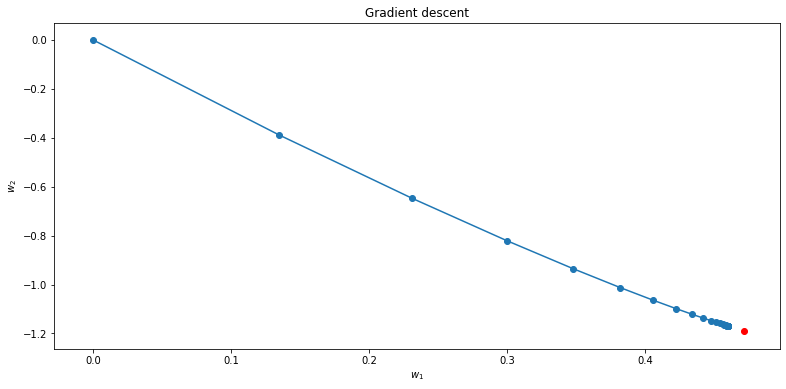

In [23]:
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

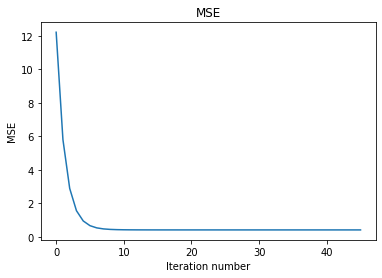

In [24]:
plt.plot(np.arange(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'log(MSE)')

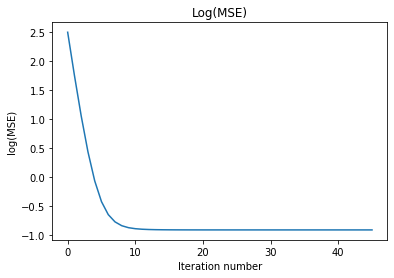

In [25]:
plt.plot(np.arange(len(errors)), np.log(np.array(errors)))
plt.title('Log(MSE)')
plt.xlabel('Iteration number')
plt.ylabel('log(MSE)')

<b> Модифицировать пример со стохастическим градиентом из этого урока, реализовав в нём рассчёт градиента по десяти случайно выбираемым объектам (mini-batch градиент). </b>

In [26]:
data, target, coef = datasets.make_regression(n_samples = 1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [27]:
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [28]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [30]:
w = np.zeros(2)
w_list = [w.copy()]
errors = []
eta = 0.01
max_iter = 1e5
min_weight_dist = 1e-8
weight_dist = np.inf
iter_num = 0

np.random.seed(1234)

while weight_dist > min_weight_dist and iter_num < max_iter:
    
    train_ind = np.random.randint(data.shape[0], size = 10)
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    error=mserror(data, new_w, target)
    errors.append(error)
    if iter_num %1000==0:
        print(error)
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'Использование стохастического градиентного спуска функционал ошибки будет {round(errors[-1], 4)}')

8188.141355904686
5521.484450864691
3728.2437215955943
2500.589781988877
1691.0981805081678
1152.8828921189306
787.1365432447
543.8486159200147
378.9864631511353
268.3730172952478
193.75146798313526
143.6075133652156
109.91286928629808
87.2932921898281
71.55225583295787
60.7986522237015
53.743351771934634
48.93940818352659
45.58566543225795
43.398114168124756
41.79801740610138
40.7481198684044
40.02991484250265
39.55557541316949
39.268233143818094
39.05361280518062
38.89302235785272
38.781672055551205
38.71317668950622
38.66482497960276
38.625382696606685
38.608175589673024
38.590133834247546
38.58453613926249
38.57700096578504
38.577170570094914
38.57274787710808
38.570938241734886
38.56974929752296
38.5700674903529
38.56933559918379
38.56881855996878
38.5686495501416
38.56879189190044
38.56930083358968
38.56973627132135
38.57137061323526
38.570604827078135
38.57076927663319
38.56934772643747
38.568471430689925
38.568906664317865
38.56897195419231
38.56915144174528
38.568712357841704
